In [2]:
##Task_1 Data Exploration and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('/content/Dataset .csv')

In [5]:
# Step 1: Identifying the number of rows and columns
rows, columns = df.shape
print(f'The dataset contains {rows} rows and {columns} columns.')

The dataset contains 9551 rows and 21 columns.


In [ ]:
# Step 2: Checking for missing values in each column
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
Restaurant ID            0
Restaurant Name          0
Country Code             0
City                     0
Address                  0
Locality                 0
Locality Verbose         0
Longitude                0
Latitude                 0
Cuisines                10
Average Cost for two     1
Currency                 1
Has Table booking        1
Has Online delivery      1
Is delivering now        1
Switch to order menu     1
Price range              1
Aggregate rating         1
Rating color             1
Rating text              1
Votes                    1
dtype: int64


In [ ]:
# For simplicity, let's drop columns with more than 50% missing values and fill other missing values with the column mean (for numerical) or mode (for categorical)
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
# Verify missing values are handled
print('Missing values after handling:')
print(df.isnull().sum())

Missing values after handling:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
# Step 3: Performing data type conversion if necessary
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'])


In [ ]:
# Display data types
print('Data types after conversion:')
print(df.dtypes)

Data types after conversion:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two    float64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range             float64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                   float64
dtype: object


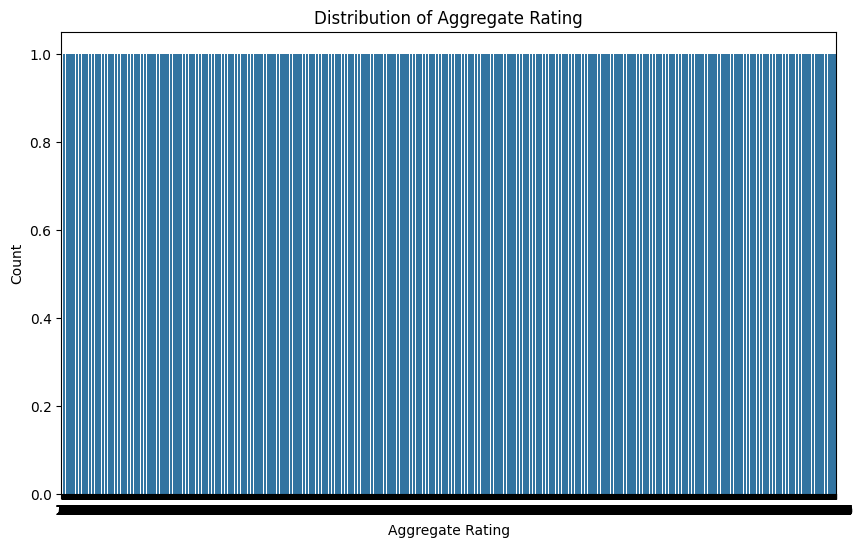

Class distribution in Aggregate Rating:
Aggregate rating
0.000000    706
3.400000    241
3.200000    239
3.700000    237
3.600000    235
3.500000    233
3.800000    232
3.300000    217
3.900000    215
3.100000    210
3.000000    190
4.100000    179
4.000000    165
2.900000    142
4.200000    140
2.800000    133
4.300000    121
4.400000     95
2.700000     93
2.600000     68
4.500000     62
4.600000     55
4.900000     42
2.500000     41
2.400000     39
4.700000     27
4.800000     19
2.300000     14
2.200000     13
2.100000      4
1.800000      1
2.000000      1
1.900000      1
2.979365      1
Name: count, dtype: int64


In [ ]:
# Step 4: Analyzing the distribution of the target variable ("Aggregate rating")
if 'Aggregate rating' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(df['Aggregate rating'])
    plt.title('Distribution of Aggregate Rating')
    plt.xlabel('Aggregate Rating')
    plt.ylabel('Count')
    plt.show()

    # Checking for class imbalance
    target_counts = df['Aggregate rating'].value_counts()
    print('Class distribution in Aggregate Rating:')
    print(target_counts)
else:
    print('Target variable "Aggregate rating" not found in the dataset.')

# TASK 2 Descriptive Analysis


In [ ]:
# Step 1: Calculate basic statistical measures for numerical columns
numerical_stats = df.describe()
print('Basic statistical measures for numerical columns:')
print(numerical_stats)

Basic statistical measures for numerical columns:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   4.411000e+03   4411.000000  4411.000000  4411.000000   
mean    9.010723e+06     27.181818    55.460764    25.883016   
std     8.745974e+06     69.104814    54.476653    10.474276   
min     5.300000e+01      1.000000  -157.948486   -38.634746   
25%     3.016990e+05      1.000000    77.030923    28.434707   
50%     5.600556e+06      1.000000    77.117637    28.532966   
75%     1.831195e+07      1.000000    77.239954    28.634623   
max     1.850065e+07    216.000000   153.593331    52.008289   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           4411.000000  4411.000000       4411.000000   4411.000000  
mean             614.488209     1.948753          2.979365    230.257596  
std              611.291155     0.931487          1.398187    565.576464  
min                0.000000     1.000000          0.000000      0.000000 

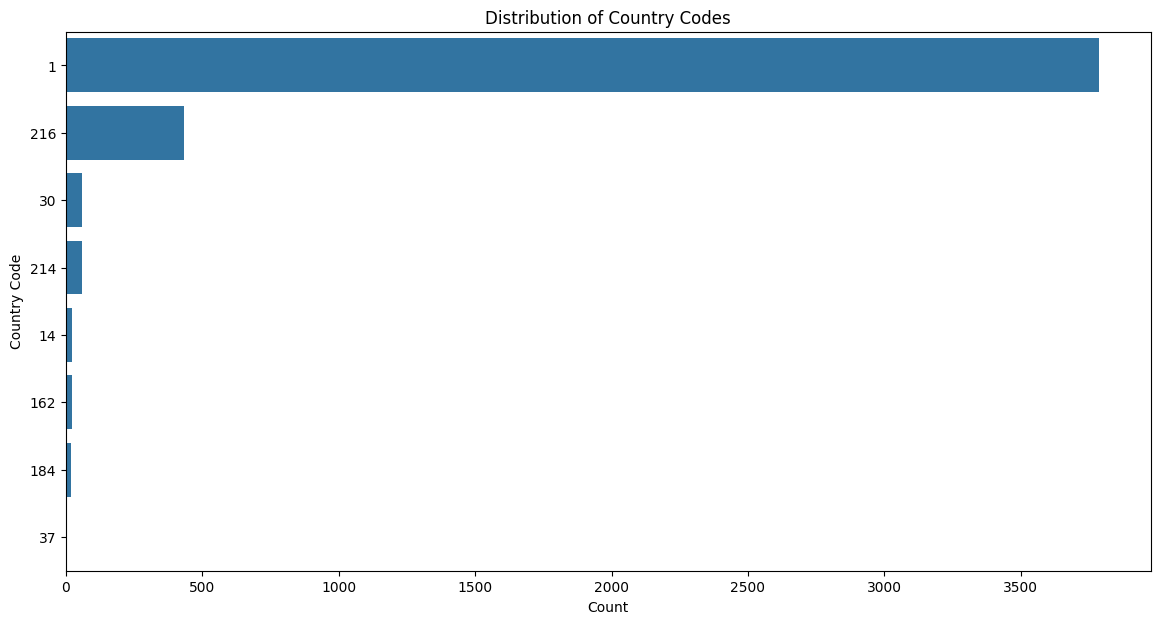

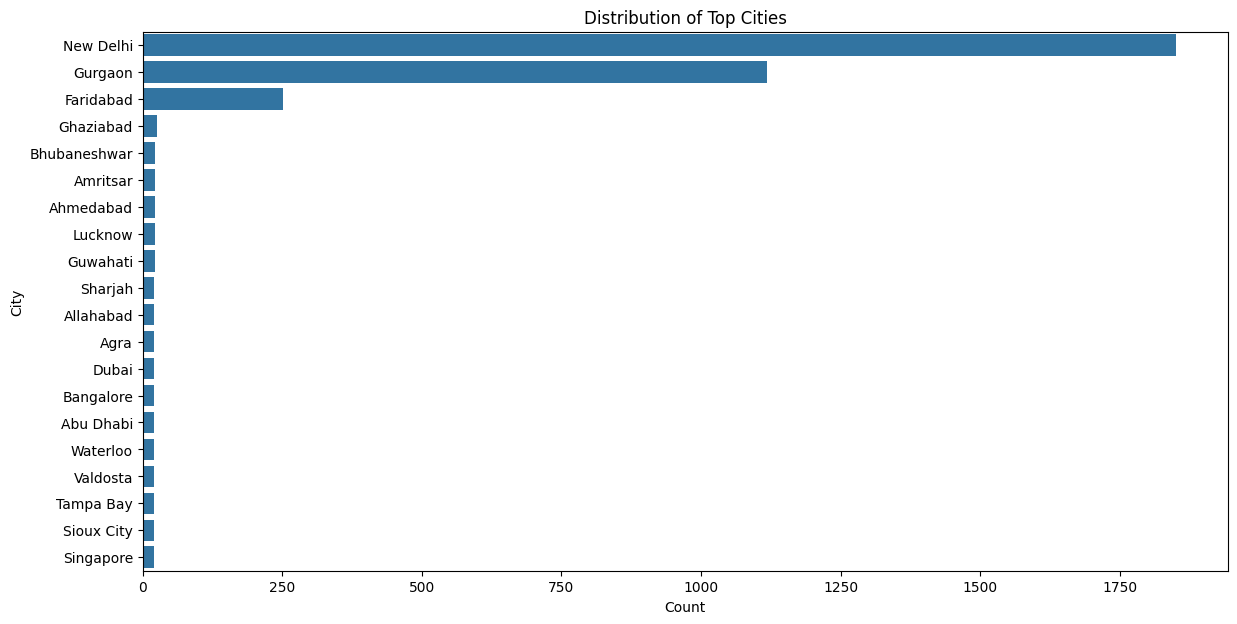

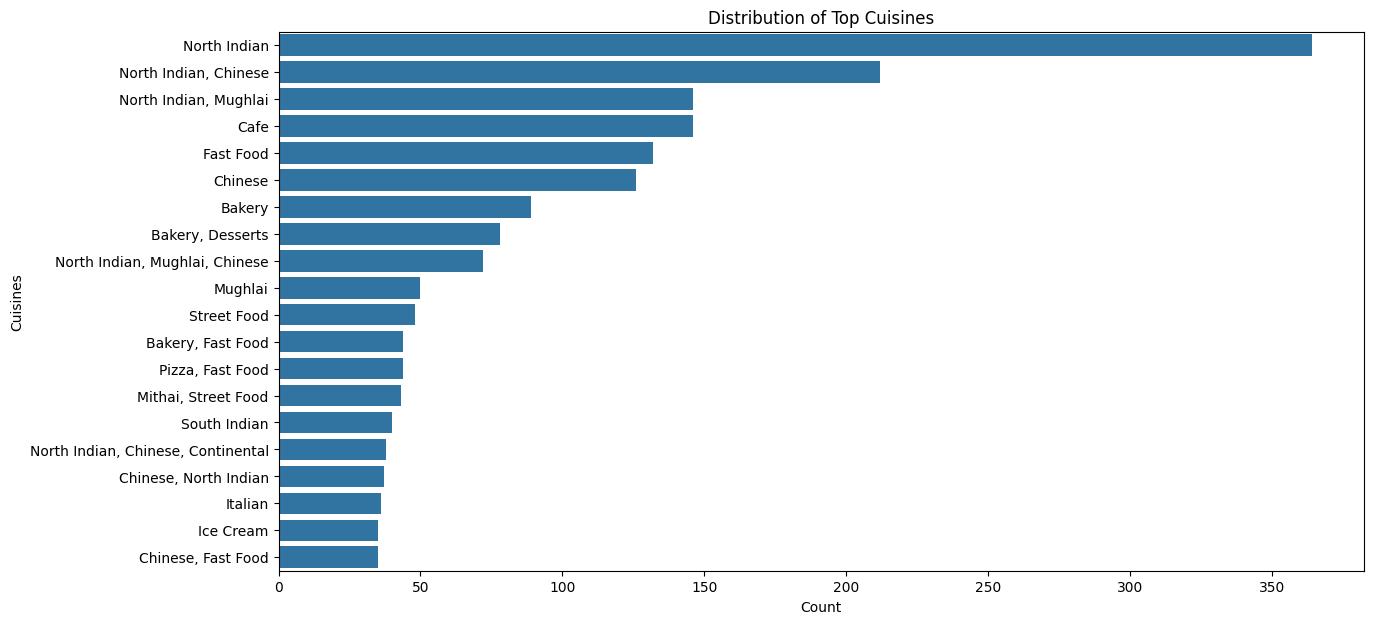

In [ ]:
# Step 2: Explore the distribution of categorical variables
# Country Code
plt.figure(figsize=(14, 7))
sns.countplot(y='Country Code', data=df, order=df['Country Code'].value_counts().index)
plt.title('Distribution of Country Codes')
plt.xlabel('Count')
plt.ylabel('Country Code')
plt.show()

# City
plt.figure(figsize=(14, 7))
top_cities = df['City'].value_counts().nlargest(20).index  # Adjust the number to display more or fewer cities
sns.countplot(y='City', data=df[df['City'].isin(top_cities)], order=top_cities)
plt.title('Distribution of Top Cities')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

# Cuisines
plt.figure(figsize=(14, 7))
top_cuisines = df['Cuisines'].value_counts().nlargest(20).index  # Adjust the number to display more or fewer cuisines
sns.countplot(y='Cuisines', data=df[df['Cuisines'].isin(top_cuisines)], order=top_cuisines)
plt.title('Distribution of Top Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()

In [ ]:
# Step 3: Identify the top cuisines and cities with the highest number of restaurants
top_cuisines_count = df['Cuisines'].value_counts().nlargest(10)  # Top 10 cuisines
top_cities_count = df['City'].value_counts().nlargest(10)  # Top 10 cities

print('Top 10 Cuisines with the highest number of restaurants:')
print(top_cuisines_count)

print('\nTop 10 Cities with the highest number of restaurants:')
print(top_cities_count)




Top 10 Cuisines with the highest number of restaurants:
Cuisines
North Indian                      364
North Indian, Chinese             212
North Indian, Mughlai             146
Cafe                              146
Fast Food                         132
Chinese                           126
Bakery                             89
Bakery, Desserts                   78
North Indian, Mughlai, Chinese     72
Mughlai                            50
Name: count, dtype: int64

Top 10 Cities with the highest number of restaurants:
City
New Delhi       1851
Gurgaon         1118
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Sharjah           20
Name: count, dtype: int64


# Task 3 Geospatial Analysis



In [ ]:
pip install folium


In [ ]:
import folium

In [ ]:
from folium.plugins import MarkerCluster

In [ ]:
# Create a map centered around a point (e.g., mean latitude and longitude)
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
map_restaurants = folium.Map(location=map_center, zoom_start=10)

# Add markers for each restaurant
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(map_restaurants)

# Save the map to an HTML file or display it
map_restaurants.save('restaurant_locations_map.html')

<ipython-input-17-9f28af67283a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Number of Restaurants', data=city_counts, palette='viridis')


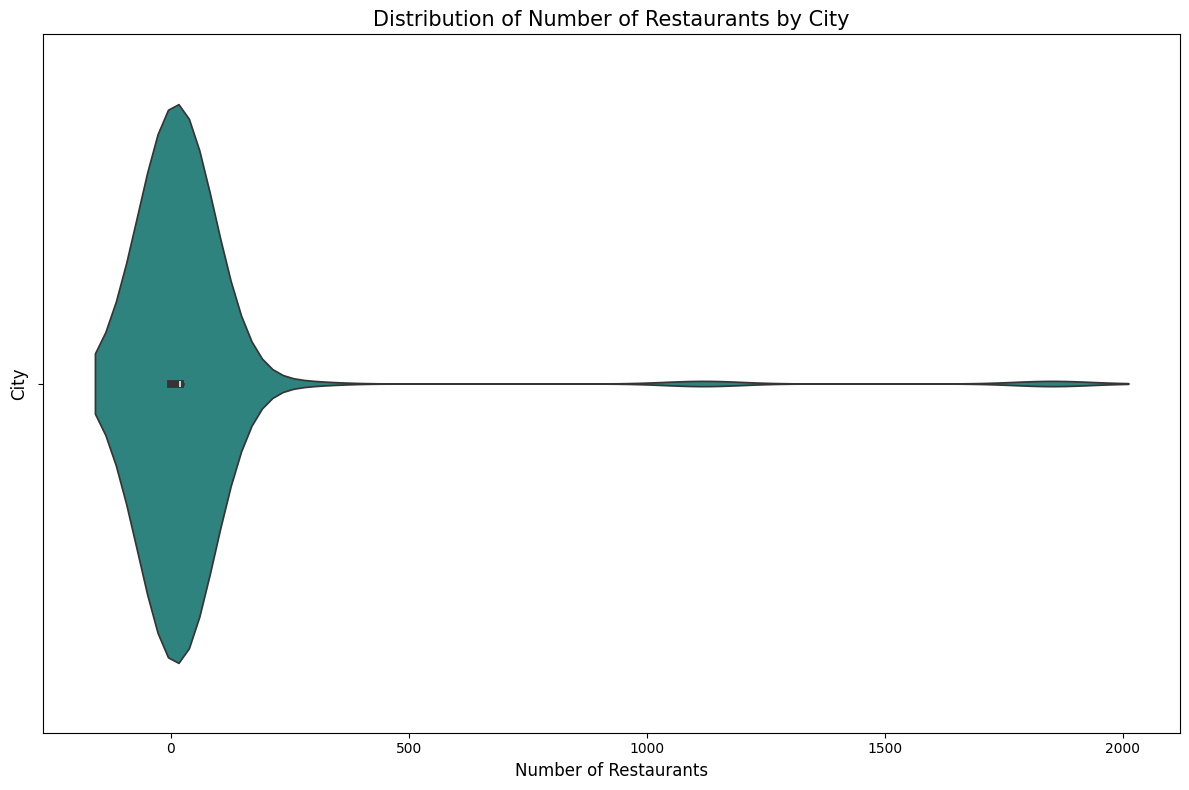

In [ ]:
# Count restaurants per city
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Restaurants']

# Plot distribution using seaborn violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Number of Restaurants', data=city_counts, palette='viridis')
plt.title('Distribution of Number of Restaurants by City', fontsize=15)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

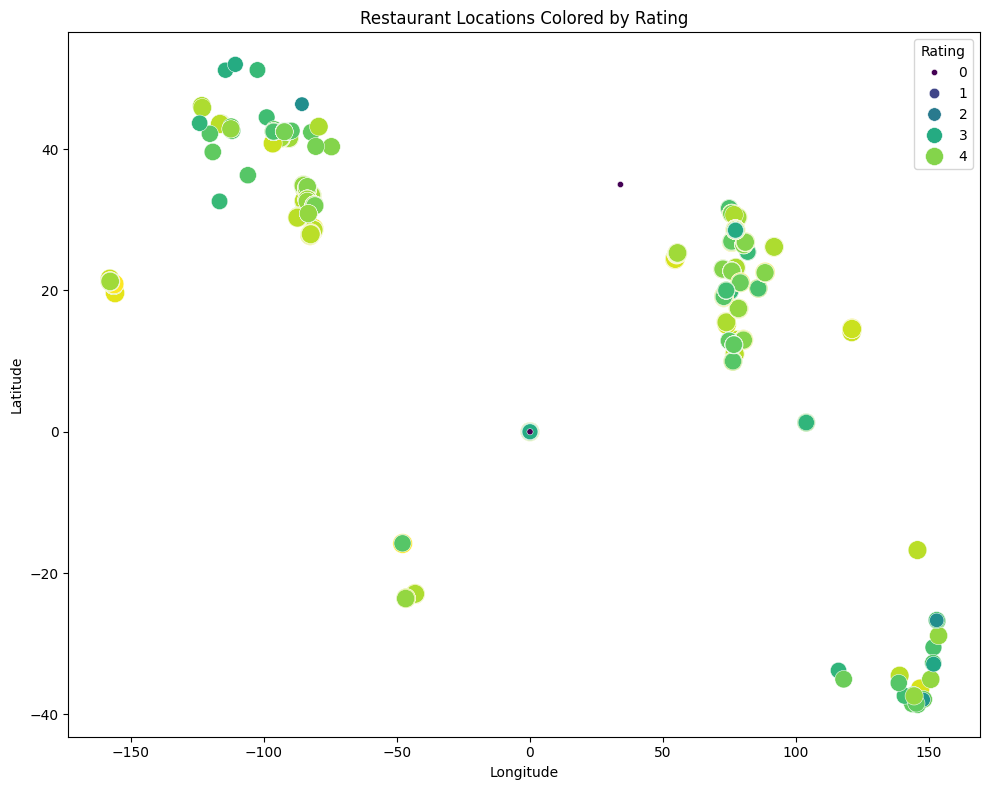

Correlation between Latitude and Rating: 0.008930399883138495
Correlation between Longitude and Rating: -0.19057316916189374


In [ ]:
import seaborn as sns

# Scatter plot of Latitude vs. Longitude colored by Rating
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', data=df, palette='viridis', size='Aggregate rating', sizes=(20, 200))
plt.title('Restaurant Locations Colored by Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

# Correlation between Latitude/Longitude and Aggregate rating
correlation_lat = df['Latitude'].corr(df['Aggregate rating'])
correlation_long = df['Longitude'].corr(df['Aggregate rating'])
print(f"Correlation between Latitude and Rating: {correlation_lat}")
print(f"Correlation between Longitude and Rating: {correlation_long}")
